# Multi-Class Logistic Regression

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
%matplotlib notebook

plt.rcParams["figure.figsize"] = (10,6)

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

pd.set_option('display.float_format', lambda x: '%.3f' % x)
#pd.options.display.float_format = '{:.3f}'.format

* The Iris flower data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems. It is sometimes called Anderson's Iris data set because Edgar Anderson collected the data to quantify the morphologic variation of Iris flowers of three related species. The data set consists of 50 samples from each of three species of Iris (Iris Setosa, Iris virginica, and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.

* The dataset contains a set of 150 records under 5 attributes - Petal Length, Petal Width, Sepal Length, Sepal width and Class(Species).

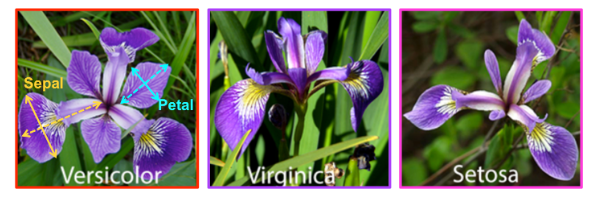

In [4]:
df = pd.read_csv('iris.csv')

In [5]:
df.head()

sepal_length  sepal_width  petal_length  petal_width species
0         5.100        3.500         1.400        0.200  setosa
1         4.900        3.000         1.400        0.200  setosa
2         4.700        3.200         1.300        0.200  setosa
3         4.600        3.100         1.500        0.200  setosa
4         5.000        3.600         1.400        0.200  setosa

## Exploratory Data Analysis and Visualization

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
df.describe().T

count  mean   std   min   25%   50%   75%   max
sepal_length 150.000 5.843 0.828 4.300 5.100 5.800 6.400 7.900
sepal_width  150.000 3.057 0.436 2.000 2.800 3.000 3.300 4.400
petal_length 150.000 3.758 1.765 1.000 1.600 4.350 5.100 6.900
petal_width  150.000 1.199 0.762 0.100 0.300 1.300 1.800 2.500

In [8]:
df['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

<IPython.core.display.Javascript object>


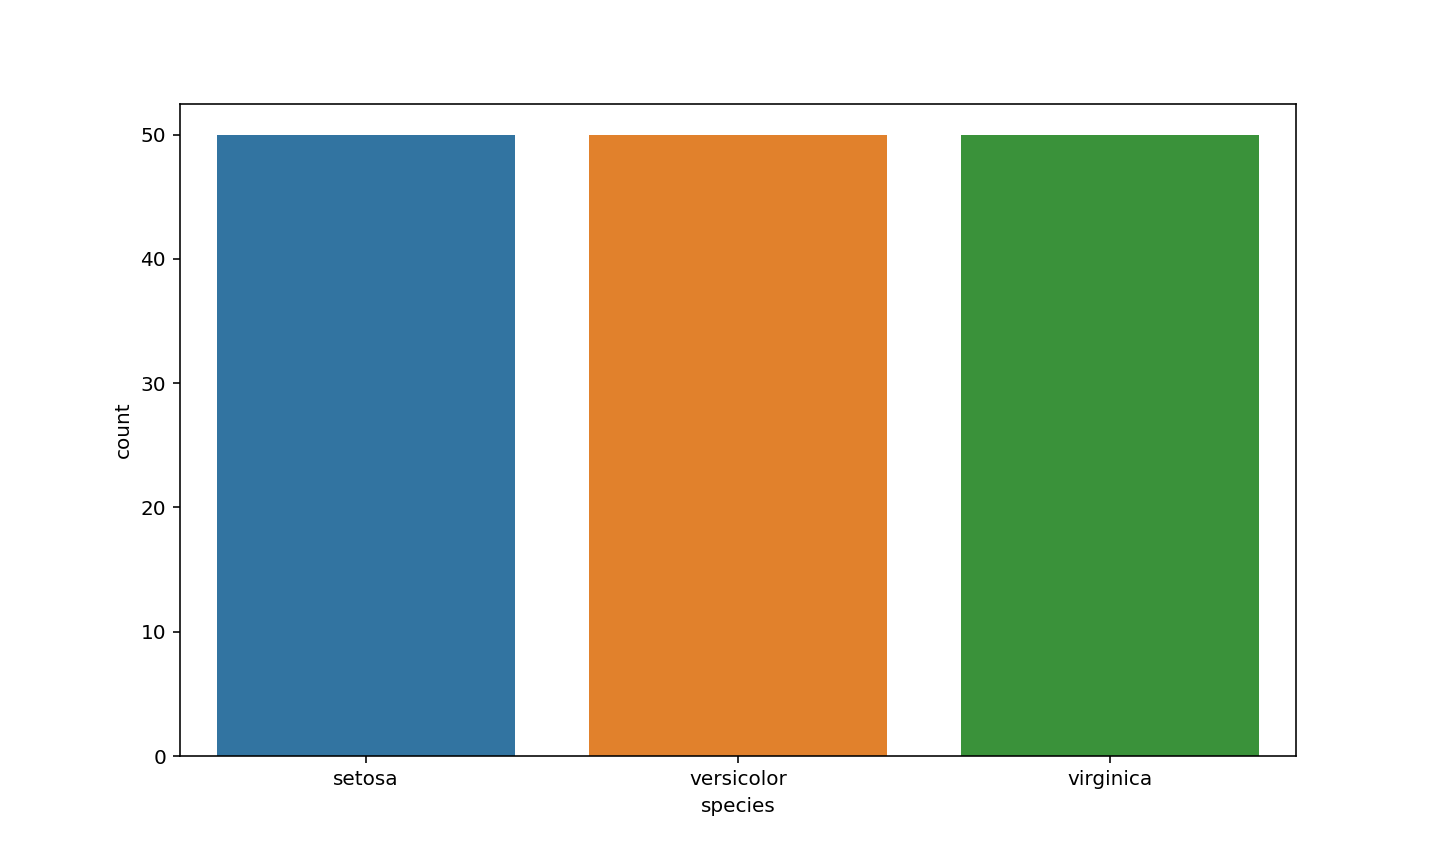

In [9]:
sns.countplot(df['species']);

<IPython.core.display.Javascript object>


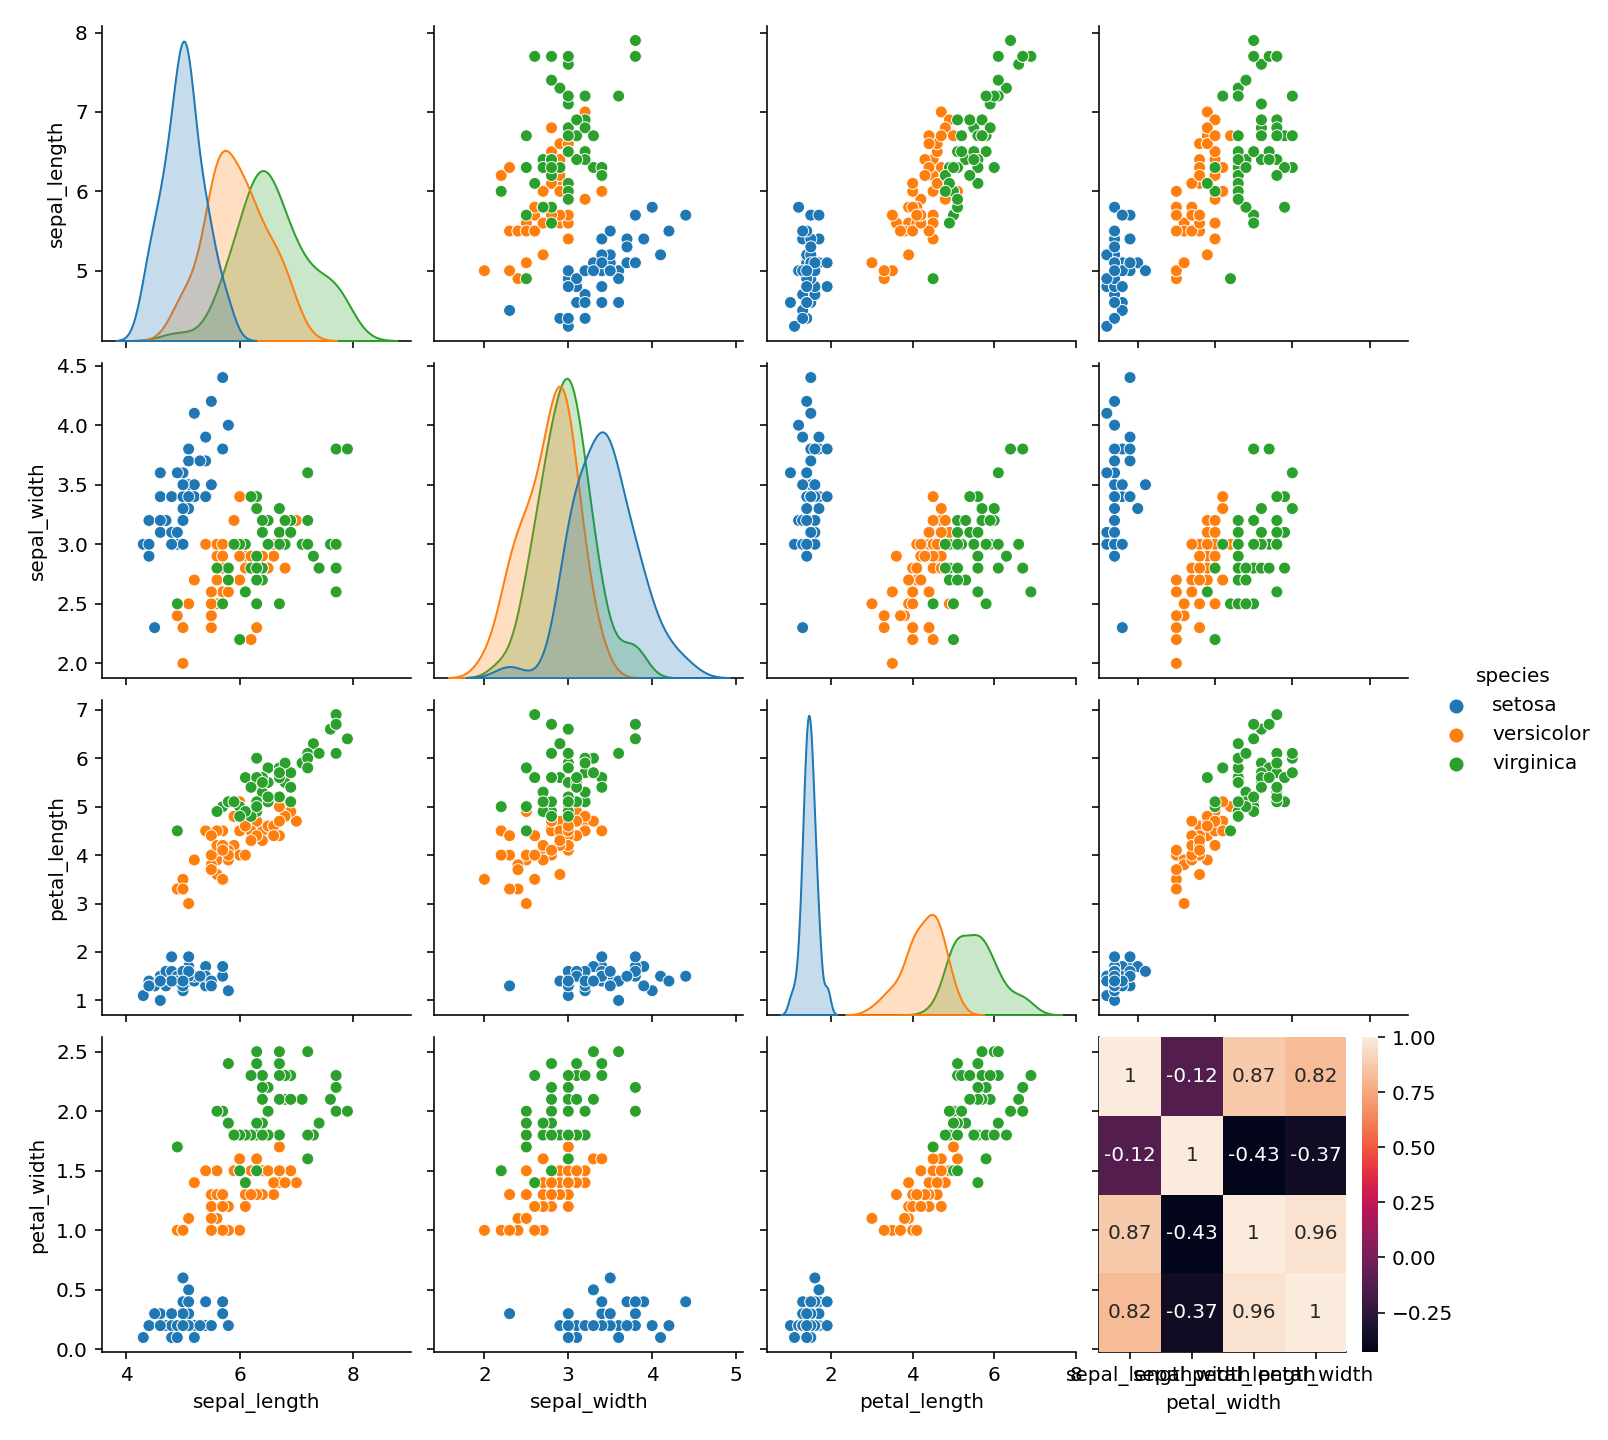

In [10]:
sns.pairplot(df,hue='species');

In [11]:
sns.heatmap(df.corr(),annot=True);

<IPython.core.display.Javascript object>


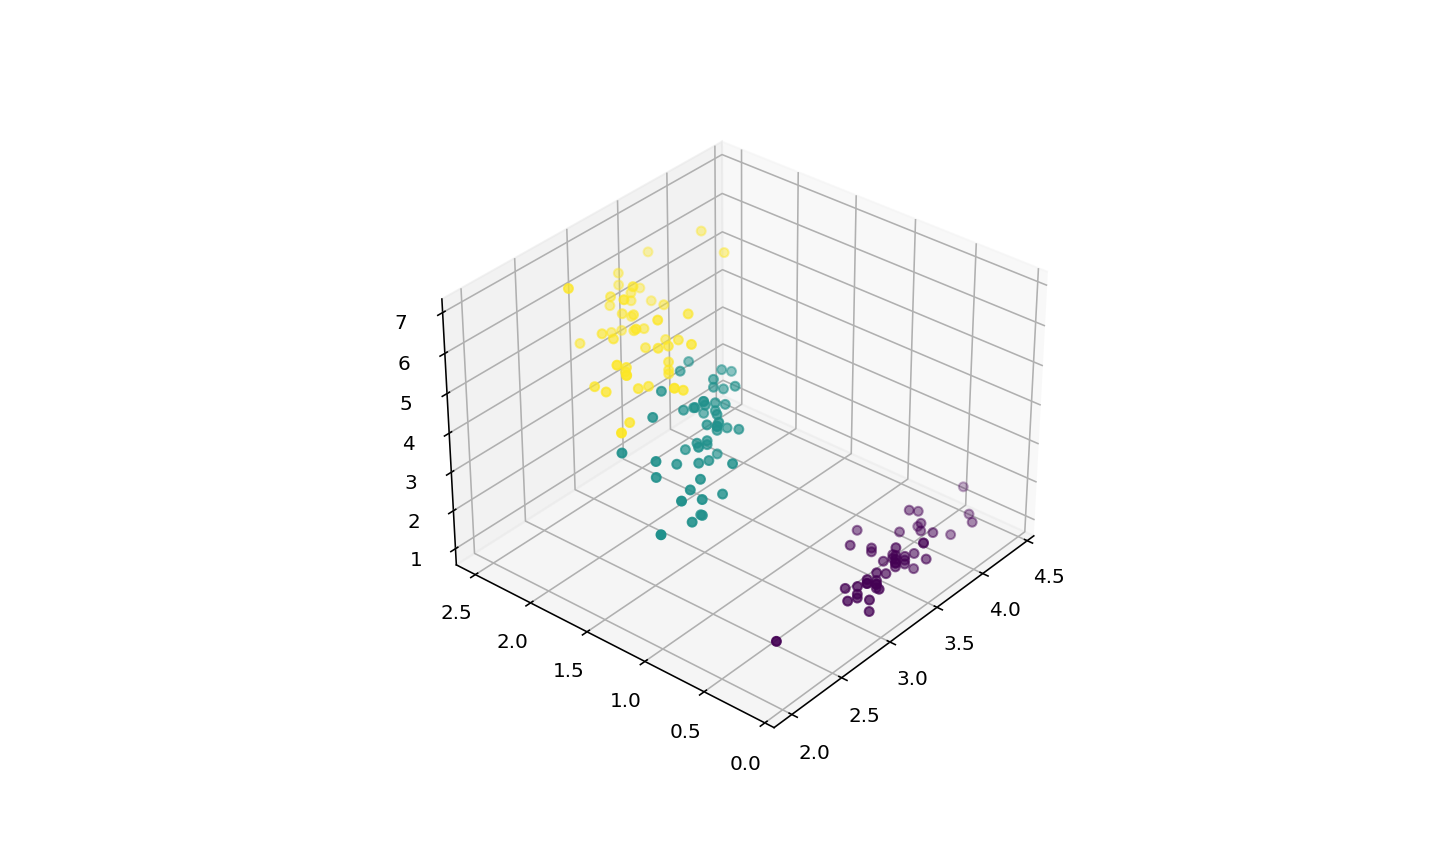

In [12]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
colors = df["species"].map({"setosa":0, "versicolor":1, "virginica":2})
ax.scatter(df["sepal_width"], df["petal_width"], df["petal_length"], c=colors);

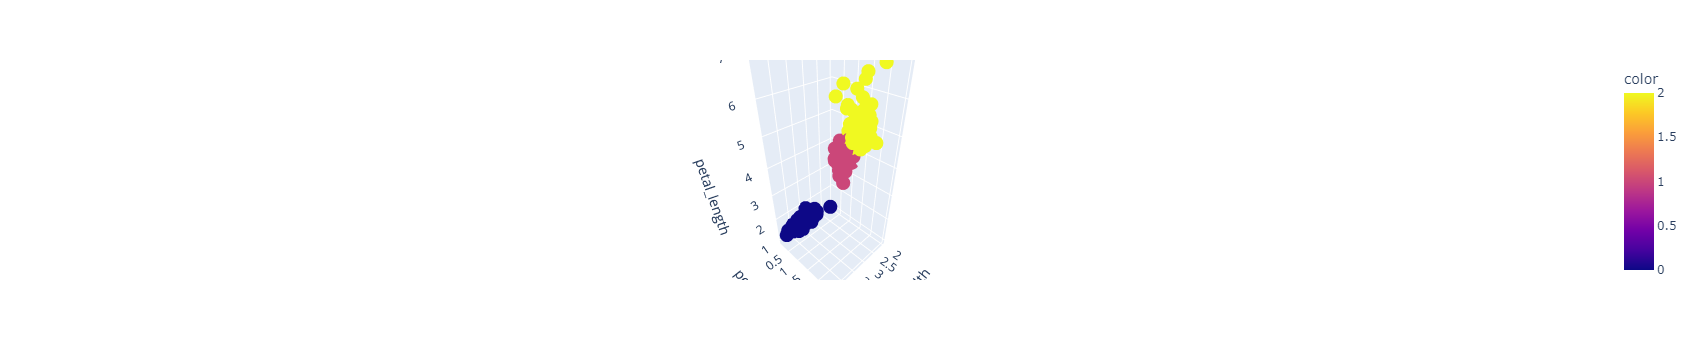

In [13]:
import plotly.express as px
colors = df["species"].map({"setosa":0, "versicolor":1, "virginica":2})
fig = px.scatter_3d(df, x="sepal_width", y="petal_width", z="petal_length", color=colors)
fig.show()

## Train | Test Split and Scaling

In [ ]:
X = df.drop('species',axis=1)
y = df['species']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Modelling and Model Performance

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix

### With Default Parameters

In [ ]:
log_model = LogisticRegression()

In [ ]:
log_model.fit(X_train_scaled,y_train)

y_pred = log_model.predict(X_test_scaled)
y_pred

In [ ]:
plot_confusion_matrix(log_model, X_test_scaled, y_test);

In [ ]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    
    print()
    
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [ ]:
eval_metric(log_model, X_train_scaled, y_train, X_test_scaled, y_test)

### Cross Validate

In [ ]:
from sklearn.model_selection import cross_validate

model = LogisticRegression()

scores = cross_validate(model, X_train_scaled, y_train, scoring = ['accuracy', 
                                                                   'precision_weighted',
                                                                   'recall_weighted',
                                                                   'f1_weighted'], cv = 10)

df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

### Cross Validate for versicolor

In [ ]:
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

f1_versicolor = make_scorer(f1_score, average = None, labels =["versicolor"])
precision_versicolor = make_scorer(precision_score, average = None, labels =["versicolor"])
recall_versicolor = make_scorer(recall_score, average = None, labels =["versicolor"])

In [ ]:
model = LogisticRegression()

scores = cross_validate(model, X_train_scaled, y_train, scoring = {"f1_versicolor":f1_versicolor, 
                                                                   "precision_versicolor":precision_versicolor,
                                                                   "recall_versicolor":recall_versicolor}, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

### Cross Validate for setosa (opsiyonel)

In [ ]:
f1_setosa = make_scorer(f1_score, average = None, labels =["setosa"])
precision_setosa = make_scorer(precision_score, average = None, labels =["setosa"])
recall_setosa = make_scorer(recall_score, average = None, labels =["setosa"])

In [ ]:
model = LogisticRegression()

scores = cross_validate(model, X_train_scaled, y_train, scoring = {"f1_setosa":f1_setosa, 
                                                                   "precision_setosa":precision_setosa,
                                                                   "recall_setosa":recall_setosa}, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

### Cross Validate for vircinica (opsiyonel)

In [ ]:
f1_virginica = make_scorer(f1_score, average = None, labels =["virginica"])
precision_virginica = make_scorer(precision_score, average = None, labels =["virginica"])
recall_virginica = make_scorer(recall_score, average = None, labels =["virginica"])

In [ ]:
model = LogisticRegression()

scores = cross_validate(model, X_train_scaled, y_train, scoring = {"f1_virginica":f1_virginica, 
                                                                   "precision_virginica":precision_virginica,
                                                                   "recall_virginica":recall_virginica}, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

## Class prediction


In [ ]:
y_pred=log_model.predict(X_test_scaled)
y_pred_proba = log_model.predict_proba(X_test_scaled)

test_data = pd.concat([X_test, y_test], axis=1)
test_data["pred"] = y_pred
test_data["pred_proba_setosa"] = y_pred_proba[:,0]
test_data["pred_proba_versicolar"] = y_pred_proba[:,1]
test_data["pred_proba_virginica"] = y_pred_proba[:,2]

test_data.sample(10)

### With Best Parameters (GridsearchCV)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [ ]:
log_model = LogisticRegression(max_iter=5000)

penalty = ["l1", "l2"]
C = np.logspace(-1, 5, 20)

param_grid = {"penalty" : penalty,
             "C" : C}

grid_model = GridSearchCV(log_model, 
                          param_grid = param_grid, 
                          cv=5) 

In [ ]:
grid_model.fit(X_train_scaled,y_train)

In [ ]:
grid_model.best_params_

In [ ]:
grid_model.best_score_

In [ ]:
y_pred = grid_model.predict(X_test_scaled)
y_pred

In [ ]:
plot_confusion_matrix(grid_model, X_test_scaled, y_test)
plt.show()

In [ ]:
eval_metric(grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

## ROC (Receiver Operating Curve) and AUC (Area Under Curve)

In [ ]:
from sklearn.metrics import plot_roc_curve

In [ ]:
plot_roc_curve(grid_model, X_test_scaled, y_test);       # multiclass olduğu için hata veriryor. en sonda yazıyor

https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

In [ ]:
from yellowbrick.classifier import ROCAUC
model = grid_model
visualizer = ROCAUC(model)

visualizer.fit(X_train_scaled, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test_scaled, y_test)        # Evaluate the model on the test data
visualizer.show();               

In [ ]:
from yellowbrick.classifier import PrecisionRecallCurve

model = grid_model

viz = PrecisionRecallCurve(
    model,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_scaled, y_train)
viz.score(X_test_scaled, y_test)
viz.show();

## Final Model and Model Deployment

In [ ]:
scaler = StandardScaler().fit(X)

In [ ]:
import pickle
pickle.dump(scaler, open("scaler_iris", 'wb'))

In [ ]:
X_scaled = scaler.transform(X)

In [ ]:
final_model = LogisticRegression().fit(X_scaled, y)

In [ ]:
pickle.dump(final_model, open("final_model_iris", 'wb'))

In [ ]:
X.describe().T

In [ ]:
my_dict = {"sepal_length": [4.5, 5.8, 7.5],
           "sepal_width": [2.2, 3, 4.2],
           "petal_length": [1.3, 4.3, 6.5],
           "petal_width": [0.2, 1.3, 2.3]
          }

In [ ]:
sample = pd.DataFrame(my_dict)
sample

In [ ]:
scaler_iris = pickle.load(open("scaler_iris", "rb"))

In [ ]:
sample_scaled = scaler_iris.transform(sample)
sample_scaled

In [ ]:
final_model = pickle.load(open("final_model_iris", "rb"))

In [ ]:
predictions = final_model.predict(sample_scaled)
predictions_proba = final_model.predict_proba(sample_scaled)

In [ ]:
sample["pred"] = predictions
sample["pred_proba_setosa"] = predictions_proba[:,0]
sample["pred_proba_versicolor"] = predictions_proba[:,1]
sample["pred_proba_virginica"] = predictions_proba[:,2]
sample